# Email Marketing Campaign
## Goal
Optimizing marketing campaigns is one of the most common data science tasks. Among the many marketing tools available, emails stand out as particularly efficient.
Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the content and/or the subject line, selecting the recipients, and determining the timing of the sends, among other factors. Machine Learning excels at this.

---

## Case Description
The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.
They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site.
You are in charge of figuring out how the email campaign performed and were asked the following questions:

1. ***What percentage of users opened the email and what percentage clicked on the link within the email?***
2. ***The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?***
3. ***By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?***
4. ***Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from glob import glob

In [2]:
# list the tables in the dataset and load them in as dataframes
dataset_path = r'D:\applications\quantacus_ml_intern\dataset'
table_names = os.listdir(dataset_path)
print(table_names)

['email_opened_table.csv', 'email_table.csv', 'link_clicked_table.csv']


In [3]:
email_opened_df = pd.read_csv(os.path.join(dataset_path, table_names[0]))
email_table_df = pd.read_csv(os.path.join(dataset_path, table_names[1]))
link_clicked_df = pd.read_csv(os.path.join(dataset_path, table_names[2]))

print(f'Features in the email_table_df are: {email_table_df.columns.values}')
print(f'Features in the email_opened_df are: {email_opened_df.columns.values}')
print(f'Features in the link_clicked_df are: {link_clicked_df.columns.values}')

Features in the email_table_df are: ['email_id' 'email_text' 'email_version' 'hour' 'weekday' 'user_country'
 'user_past_purchases']
Features in the email_opened_df are: ['email_id']
Features in the link_clicked_df are: ['email_id']


In [4]:
print(f'Shape of {table_names[1]} dataframe: {email_table_df.shape}')
print(f'Duplicates? {(email_table_df.duplicated(subset=["email_id"])).value_counts()}')
email_table_df.head()

Shape of email_table.csv dataframe: (100000, 7)
Duplicates? False    100000
Name: count, dtype: int64


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [5]:
print(f'Shape of {table_names[0]} dataframe: {email_opened_df.shape}')
print(f'Duplicates? {(email_opened_df.duplicated(subset=["email_id"])).value_counts()}')
email_opened_df.head()

Shape of email_opened_table.csv dataframe: (10345, 1)
Duplicates? False    10345
Name: count, dtype: int64


,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [6]:
print(f'Shape of {table_names[2]} dataframe: {link_clicked_df.shape}')
print(f'Duplicates? {(link_clicked_df.duplicated(subset=["email_id"])).value_counts()}')
link_clicked_df.head()

Shape of link_clicked_table.csv dataframe: (2119, 1)
Duplicates? False    2119
Name: count, dtype: int64


,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [7]:
# add 2 new columns to email_table_df called email_opened and link_clicked by merging the email_opened_df and link_clicked_df into email_table_df
email_table_df['email_opened'] = email_table_df['email_id'].isin(email_opened_df['email_id'])
email_table_df['link_clicked'] = email_table_df['email_id'].isin(link_clicked_df['email_id'])

email_table_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,False,False
1,966622,long_email,personalized,12,Sunday,UK,2,True,True
2,777221,long_email,personalized,11,Wednesday,US,2,False,False
3,493711,short_email,generic,6,Monday,UK,1,False,False
4,106887,long_email,generic,14,Monday,US,6,False,False


---

### Question 1
*Done*

***What percentage of users opened the email and what percentage clicked on the link within the email?***

In [8]:
email_opened_perc = (email_table_df['email_opened'].value_counts().get(True, 0) / email_table_df.shape[0]) * 100
link_clicked_perc = (email_table_df['link_clicked'].value_counts().get(True, 0) / email_table_df.shape[0]) * 100

print(f"Percentage of users who opened the email: {email_opened_perc}")
print(f"Percentage of users who clicked on the link: {link_clicked_perc}")

Percentage of users who opened the email: 10.345
Percentage of users who clicked on the link: 2.119


### Question 2

***The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?***

#### 1. Visualization and Analysis
 We begin with visualizing the features and analyizing their impact on link clicking rates

In [9]:
email_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_opened         100000 non-null  bool  
 8   link_clicked         100000 non-null  bool  
dtypes: bool(2), int64(3), object(4)
memory usage: 5.5+ MB



--- EMAIL_VERSION ---


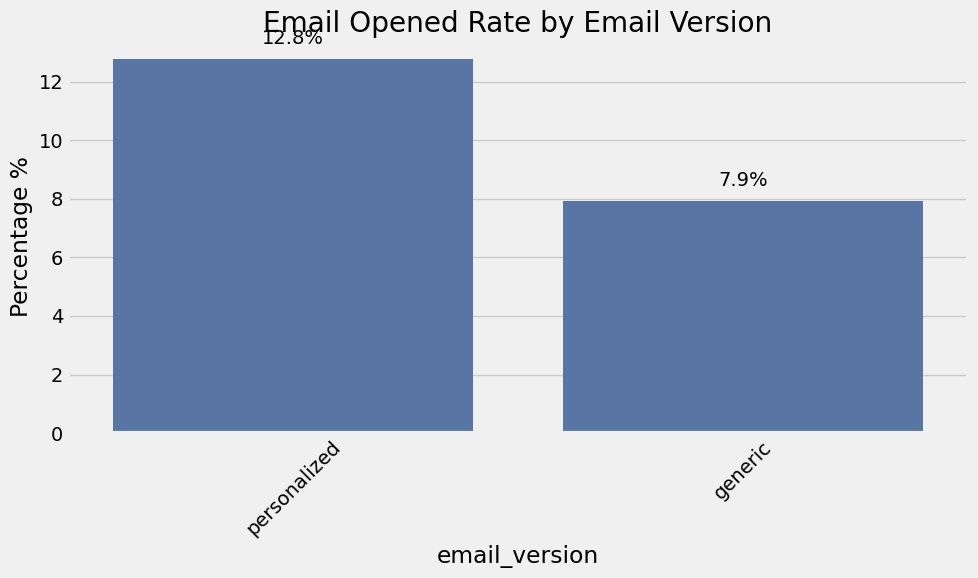

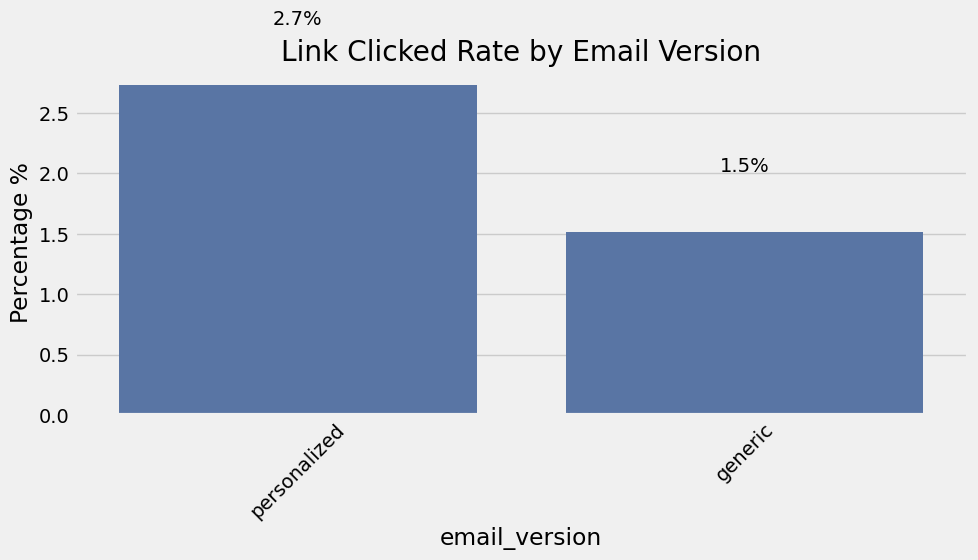


--- WEEKDAY ---


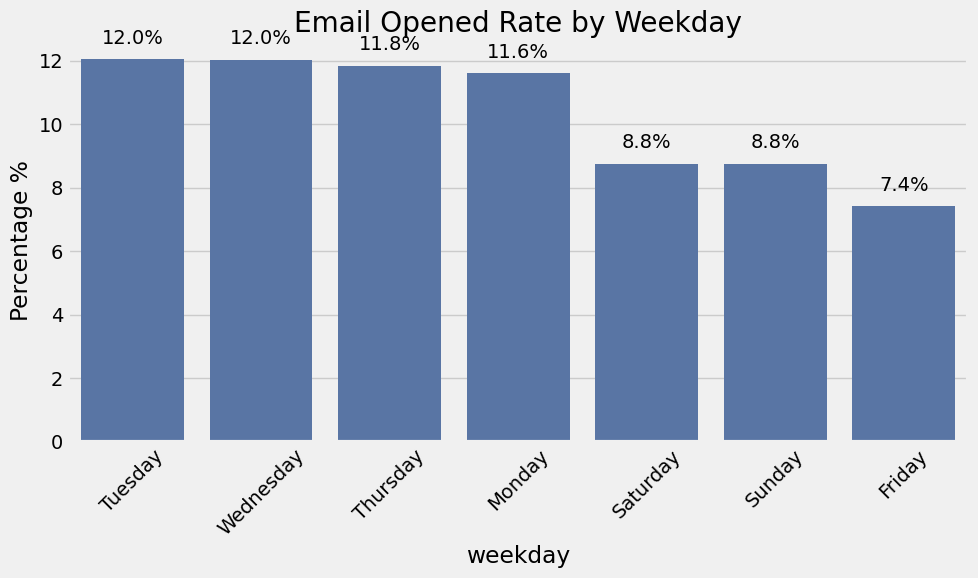

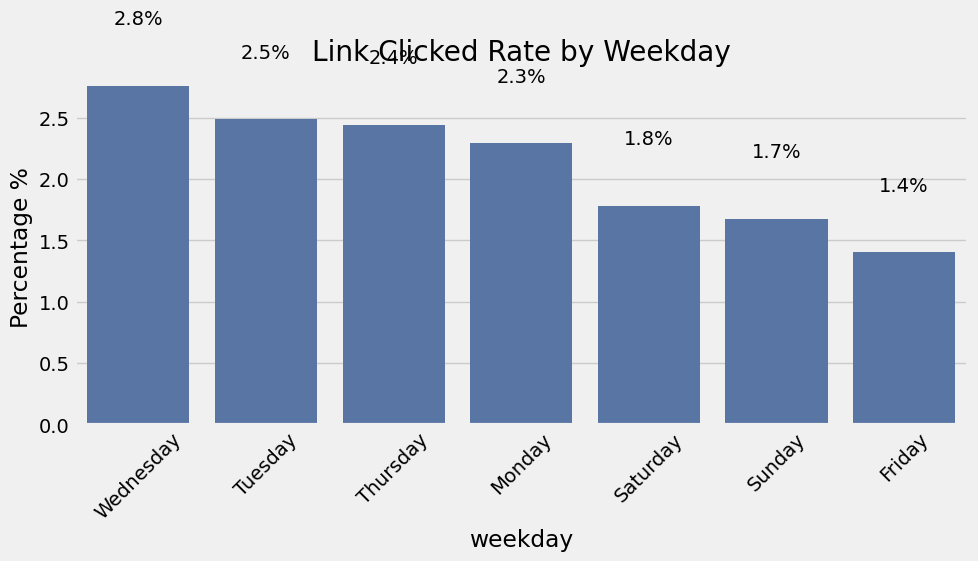


--- USER_COUNTRY ---


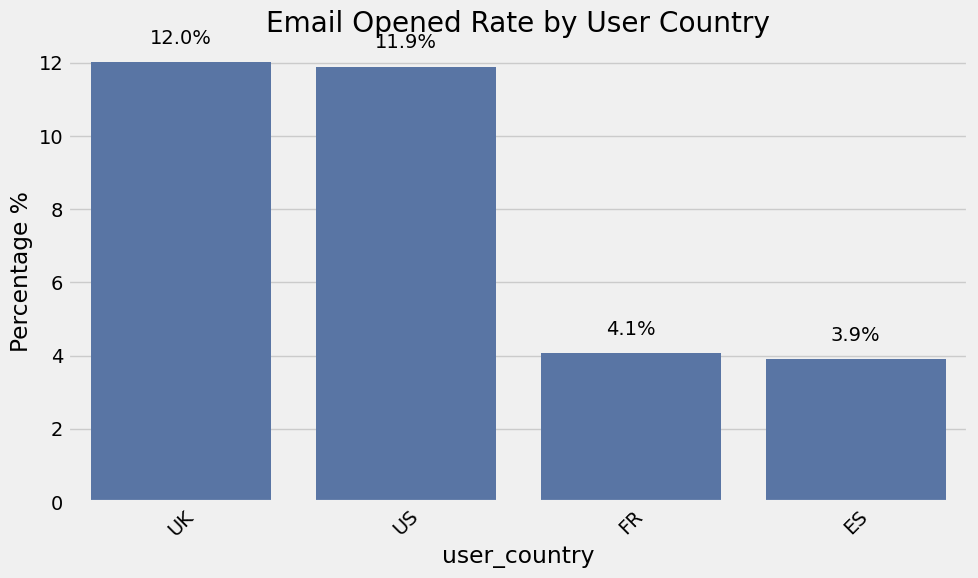

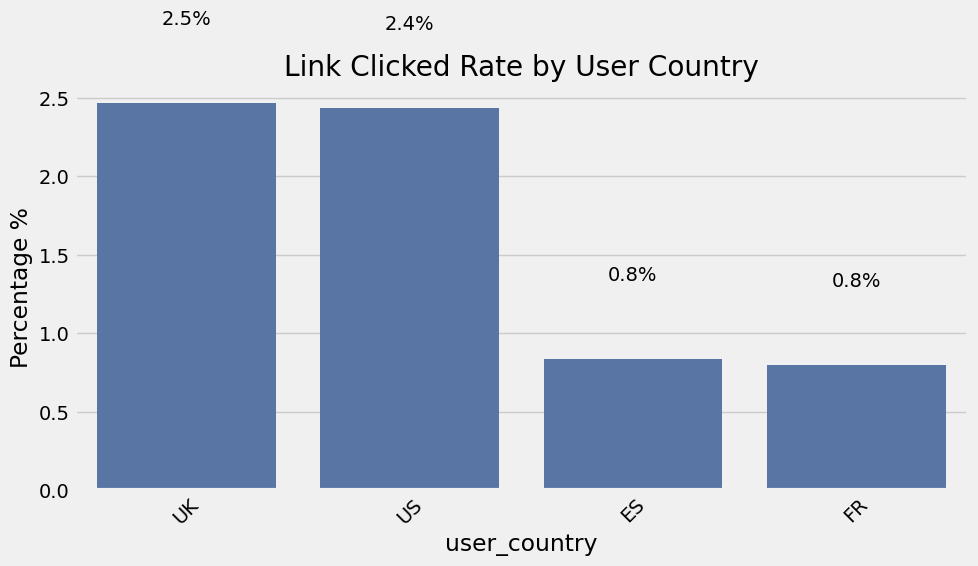


--- HOUR ---


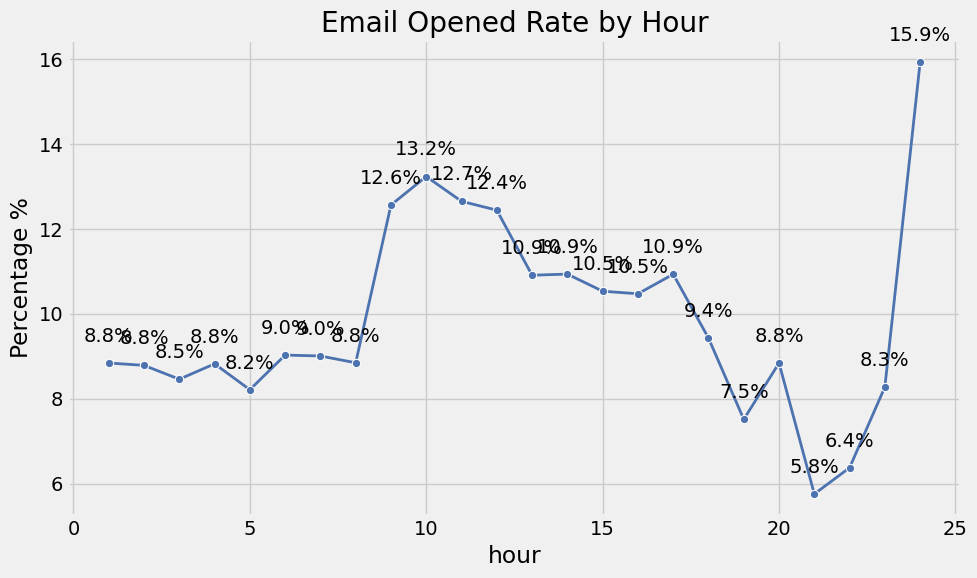

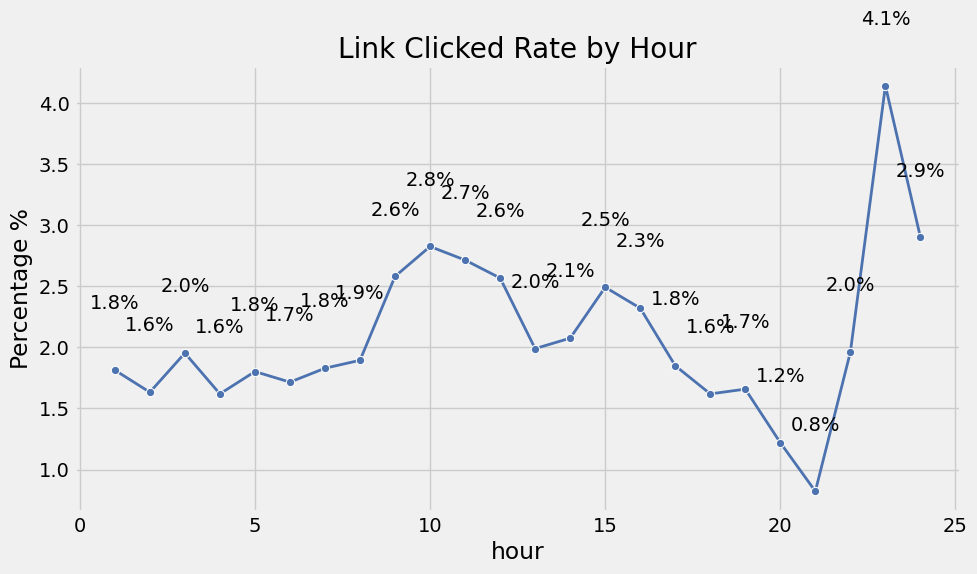


--- USER_PAST_PURCHASES ---


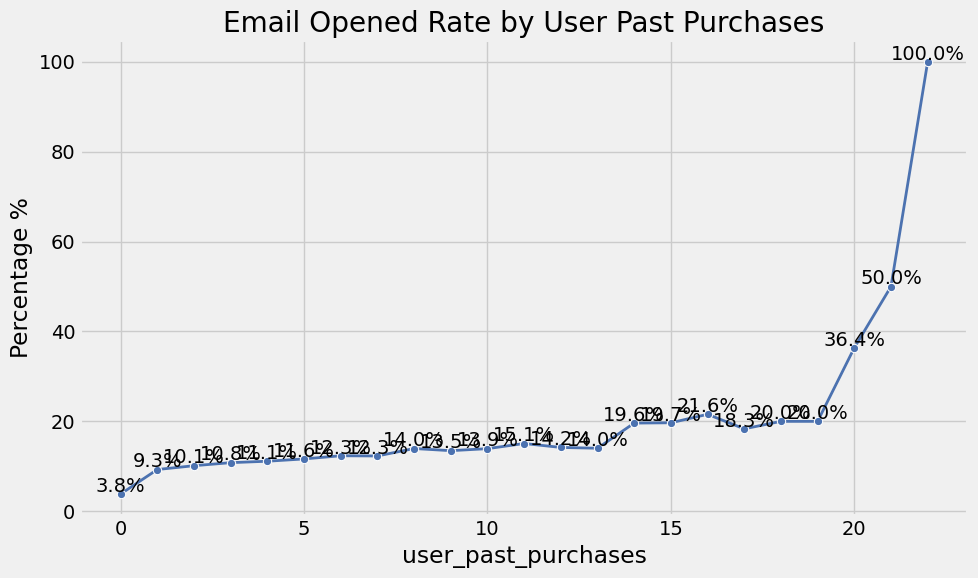

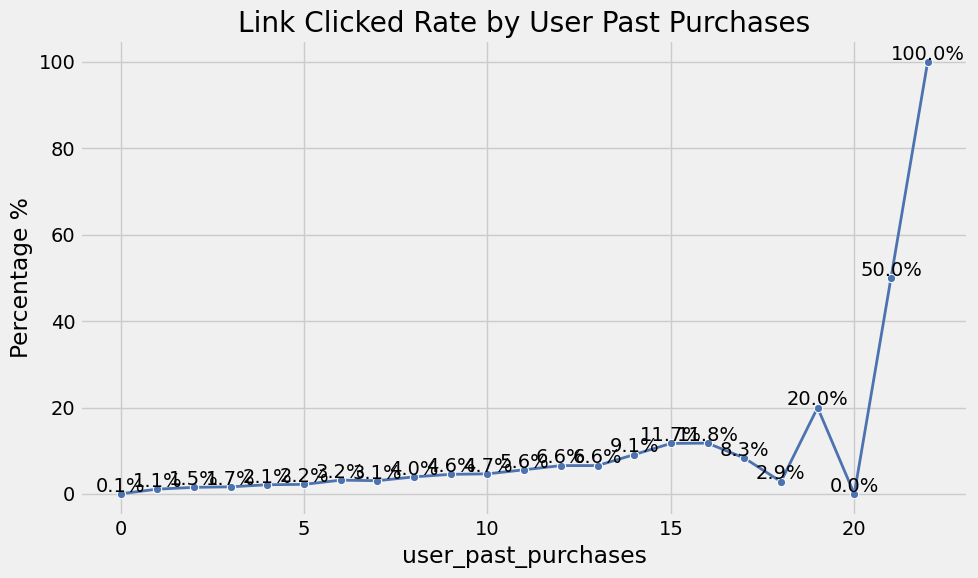

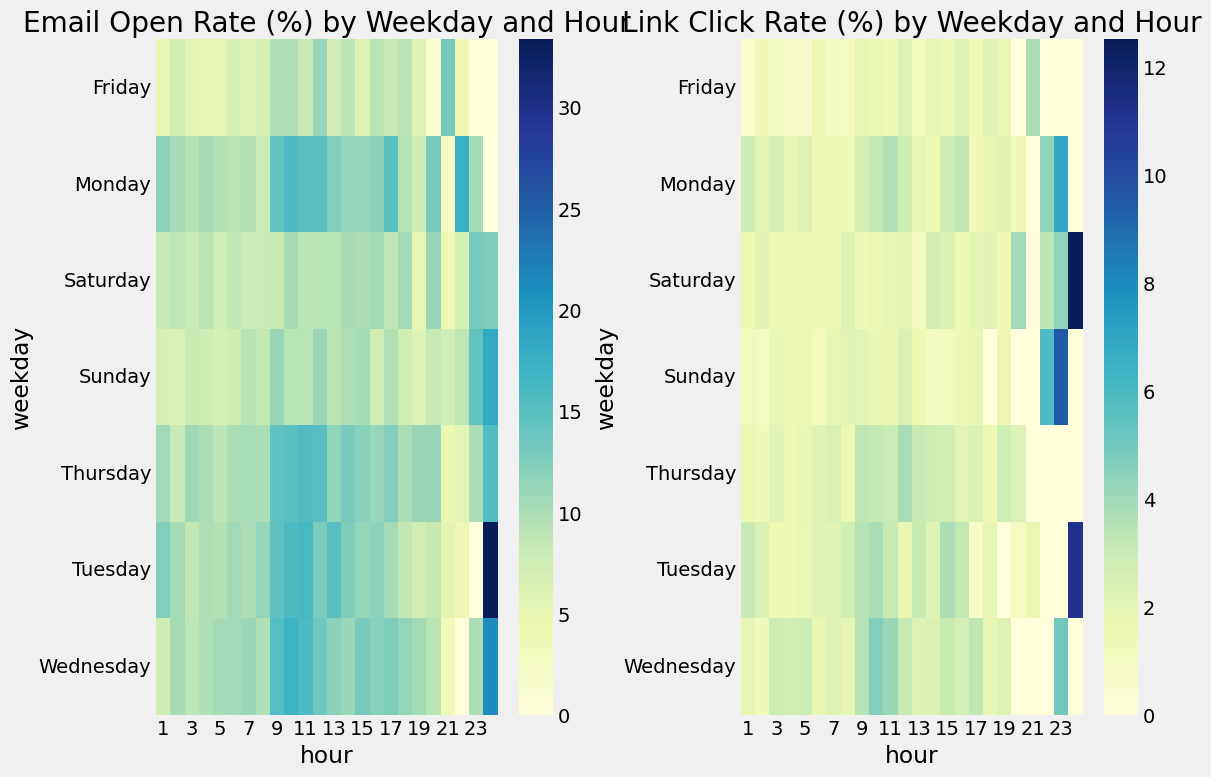

In [10]:
# let's begin with visualizing how different factors affect opening the email and the clicking on the link
import seaborn as sns
import pandas as pd

# Set up the visualization style
plt.style.use('fivethirtyeight')
sns.set_palette("deep")

# Function to plot categorical features
def plot_categorical_feature(df, feature, target):
    plt.figure(figsize=(10, 6))
    
    # Calculate percentages
    pcts = df.groupby(feature)[target].mean().sort_values(ascending=False) * 100
    
    # Plot bars
    ax = sns.barplot(x=pcts.index, y=pcts.values)
    
    # Add value labels on top of the bars
    for i, v in enumerate(pcts.values):
        ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')
    
    plt.title(f'{target.replace("_", " ").title()} Rate by {feature.replace("_", " ").title()}')
    plt.ylabel('Percentage %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot numeric features
def plot_numeric_feature(df, feature, target):
    plt.figure(figsize=(10, 6))
    
    # Group by feature and calculate mean of target
    data = df.groupby(feature)[target].agg(['mean', 'count']).reset_index()
    data['mean'] *= 100  # Convert to percentage
    
    # Plot line
    ax = sns.lineplot(x=feature, y='mean', data=data, marker='o', linewidth=2)
    
    # Add value labels
    for x, y in zip(data[feature], data['mean']):
        ax.text(x, y + 0.5, f"{y:.1f}%", ha='center')
    
    plt.title(f'{target.replace("_", " ").title()} Rate by {feature.replace("_", " ").title()}')
    plt.ylabel('Percentage %')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Convert boolean values to integers for easier plotting
email_table_df['email_opened'] = email_table_df['email_opened'].astype(int)
email_table_df['link_clicked'] = email_table_df['link_clicked'].astype(int)

# Plot each categorical feature
categorical_features = ['email_version', 'weekday', 'user_country']
for feature in categorical_features:
    print(f"\n--- {feature.upper()} ---")
    plot_categorical_feature(email_table_df, feature, 'email_opened')
    plot_categorical_feature(email_table_df, feature, 'link_clicked')

# Plot each numeric feature
numeric_features = ['hour', 'user_past_purchases']
for feature in numeric_features:
    print(f"\n--- {feature.upper()} ---")
    plot_numeric_feature(email_table_df, feature, 'email_opened')
    plot_numeric_feature(email_table_df, feature, 'link_clicked')

# Additional - Heatmap for weekday vs hour
plt.figure(figsize=(12, 8))

# For email opens
plt.subplot(1, 2, 1)
heatmap_data = email_table_df.pivot_table(
    values='email_opened', 
    index='weekday', 
    columns='hour', 
    aggfunc='mean'
) * 100
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlGnBu')
plt.title('Email Open Rate (%) by Weekday and Hour')

# For link clicks
plt.subplot(1, 2, 2)
heatmap_data = email_table_df.pivot_table(
    values='link_clicked', 
    index='weekday', 
    columns='hour', 
    aggfunc='mean'
) * 100
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlGnBu')
plt.title('Link Click Rate (%) by Weekday and Hour')

plt.tight_layout()
plt.show()

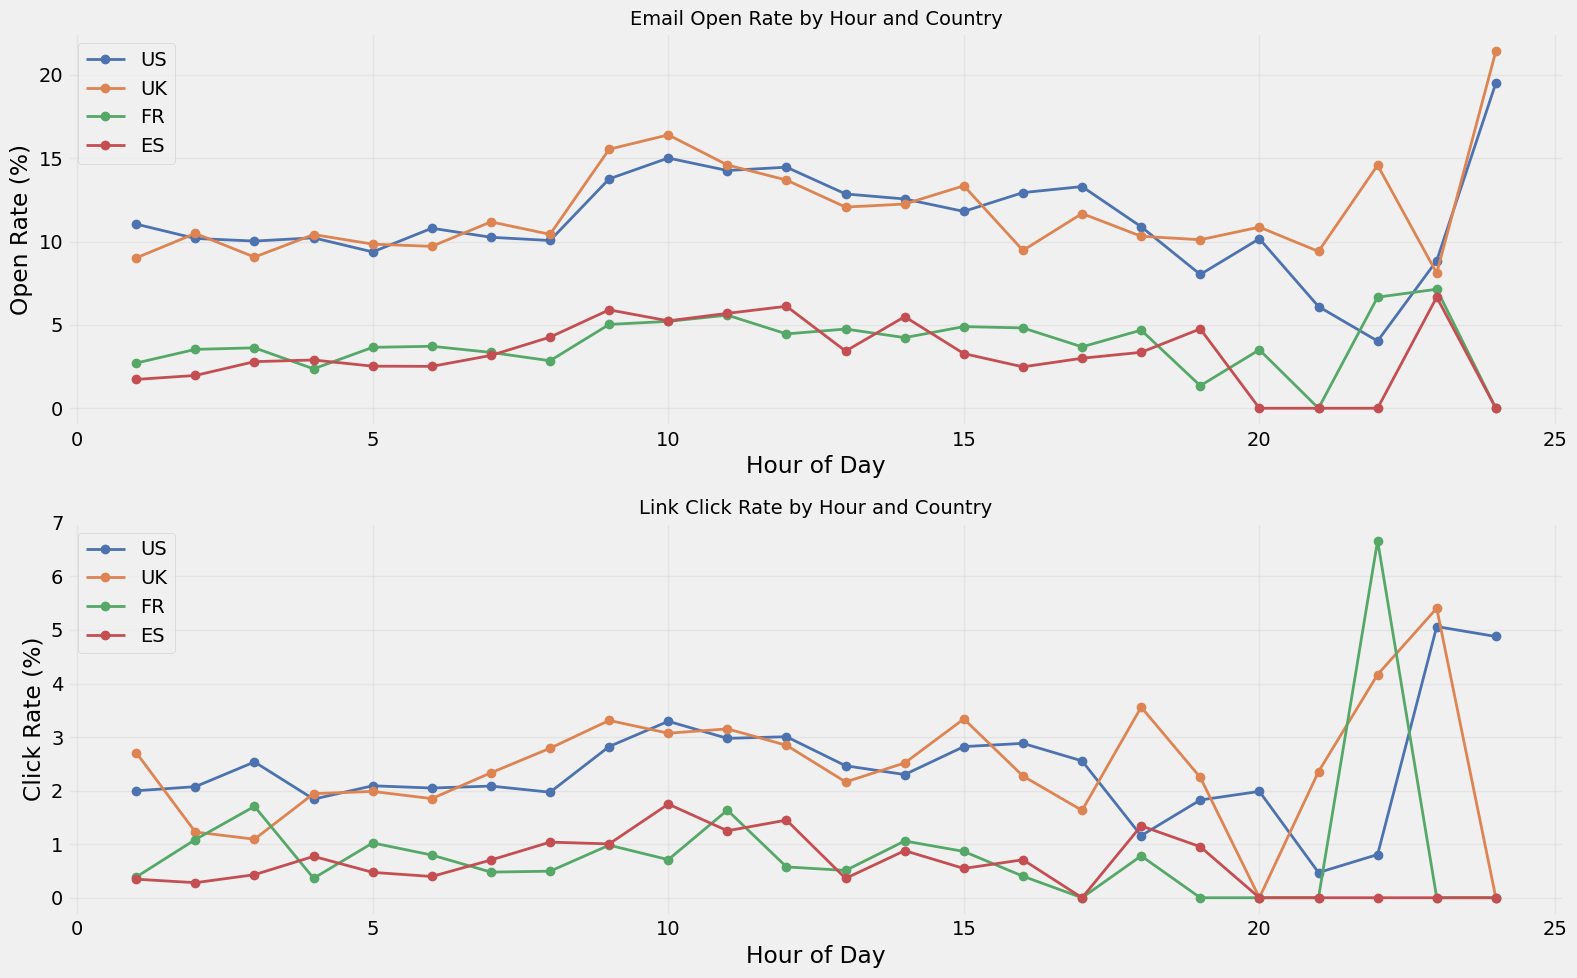

In [11]:
# Create faceted hour plots by country
plt.figure(figsize=(16, 10))

# Get top countries for readability
top_countries = email_table_df['user_country'].value_counts().nlargest(4).index

# Filter data to include only top countries
filtered_df = email_table_df[email_table_df['user_country'].isin(top_countries)]

# Create subplot for email opens
plt.subplot(2, 1, 1)
for country in top_countries:
    country_data = filtered_df[filtered_df['user_country'] == country]
    hourly_open_rates = country_data.groupby('hour')['email_opened'].mean() * 100
    plt.plot(hourly_open_rates.index, hourly_open_rates.values, marker='o', linewidth=2, label=country)

plt.title('Email Open Rate by Hour and Country', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Open Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Create subplot for link clicks
plt.subplot(2, 1, 2)
for country in top_countries:
    country_data = filtered_df[filtered_df['user_country'] == country]
    hourly_click_rates = country_data.groupby('hour')['link_clicked'].mean() * 100
    plt.plot(hourly_click_rates.index, hourly_click_rates.values, marker='o', linewidth=2, label=country)

plt.title('Link Click Rate by Hour and Country', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Click Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

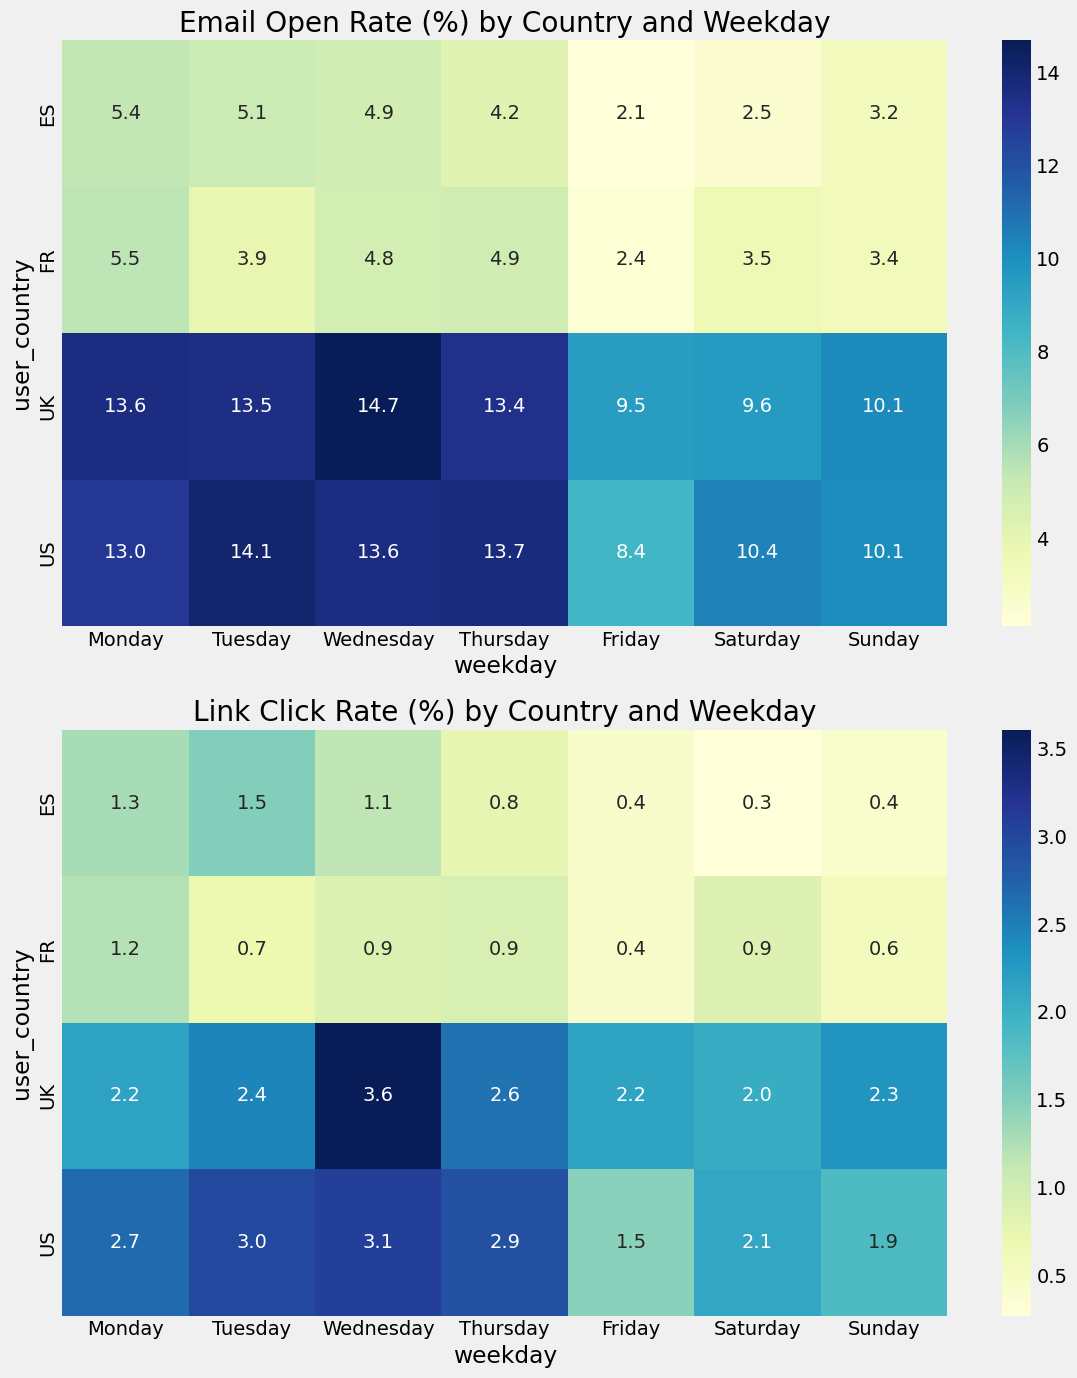

In [12]:
# Create heatmaps for country × weekday
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Order weekdays properly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# For email opens
pivot_opens = email_table_df.pivot_table(
    values='email_opened',
    index='user_country', 
    columns='weekday',
    aggfunc='mean'
) * 100

# Reorder columns
pivot_opens = pivot_opens[weekday_order]

sns.heatmap(pivot_opens, cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[0])
axes[0].set_title('Email Open Rate (%) by Country and Weekday')

# For link clicks
pivot_clicks = email_table_df.pivot_table(
    values='link_clicked',
    index='user_country', 
    columns='weekday',
    aggfunc='mean'
) * 100

# Reorder columns
pivot_clicks = pivot_clicks[weekday_order]

sns.heatmap(pivot_clicks, cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[1])
axes[1].set_title('Link Click Rate (%) by Country and Weekday')

plt.tight_layout()
plt.show()

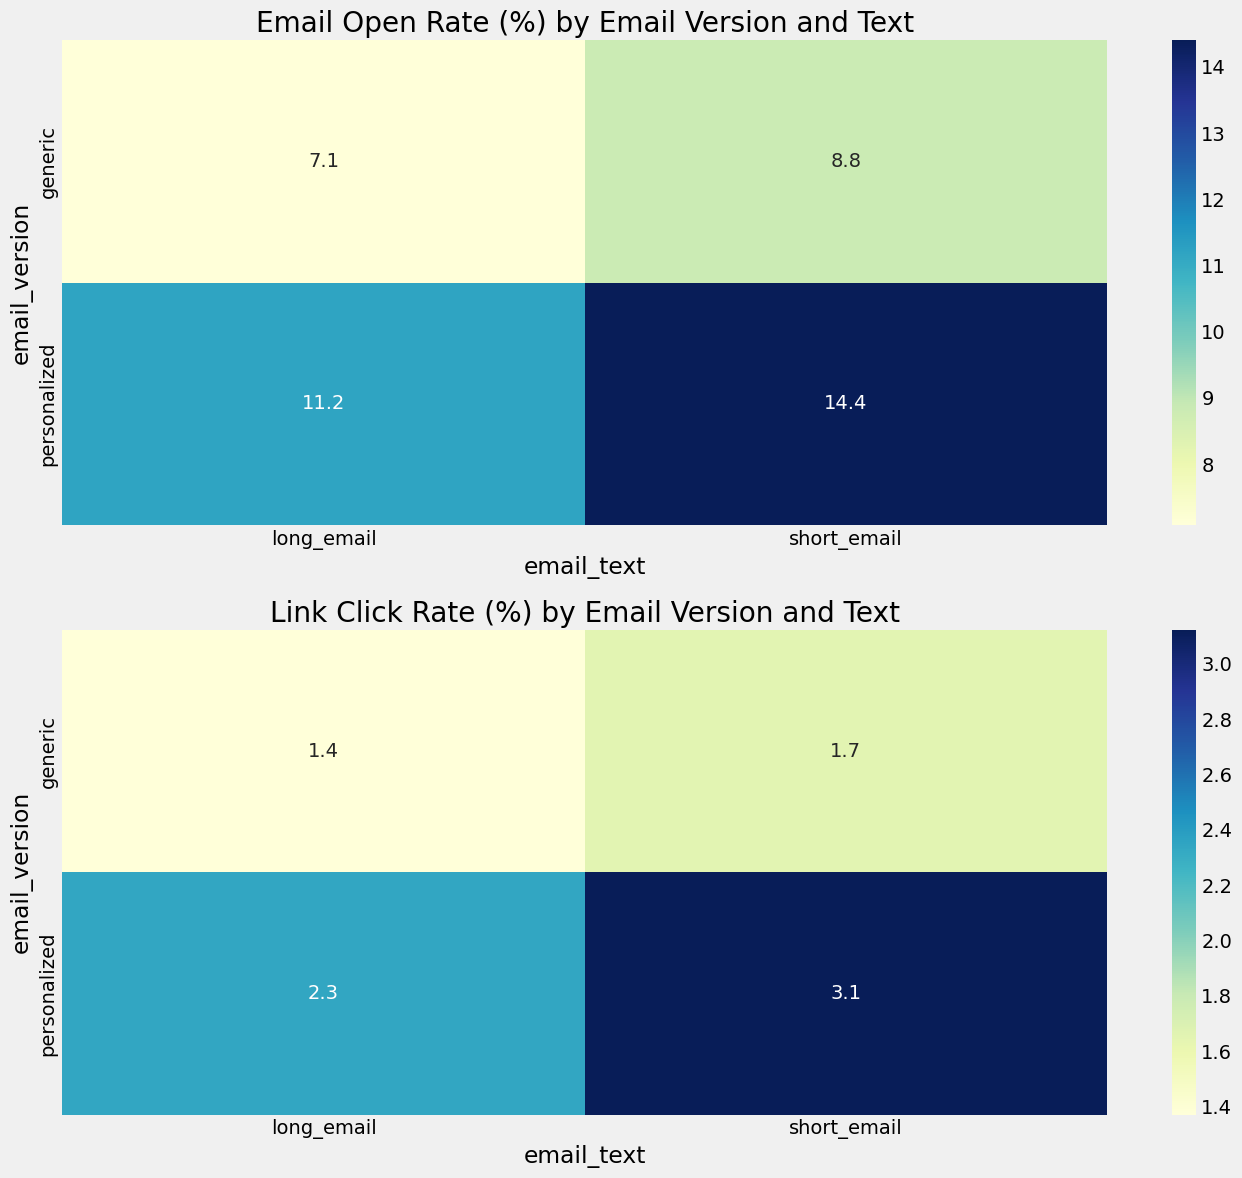

In [13]:
# Create heatmaps for email_version × email_text
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# For email opens
pivot_opens = email_table_df.pivot_table(
    values='email_opened',
    index='email_version', 
    columns='email_text',
    aggfunc='mean'
) * 100

sns.heatmap(pivot_opens, cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[0])
axes[0].set_title('Email Open Rate (%) by Email Version and Text')

# For link clicks
pivot_clicks = email_table_df.pivot_table(
    values='link_clicked',
    index='email_version', 
    columns='email_text',
    aggfunc='mean'
) * 100

sns.heatmap(pivot_clicks, cmap='YlGnBu', annot=True, fmt='.1f', ax=axes[1])
axes[1].set_title('Link Click Rate (%) by Email Version and Text')

plt.tight_layout()
plt.show()

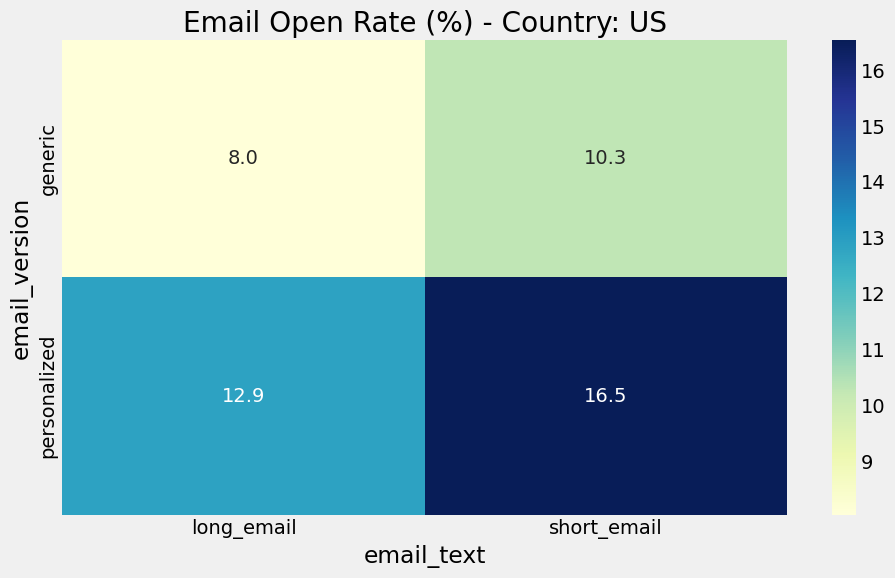

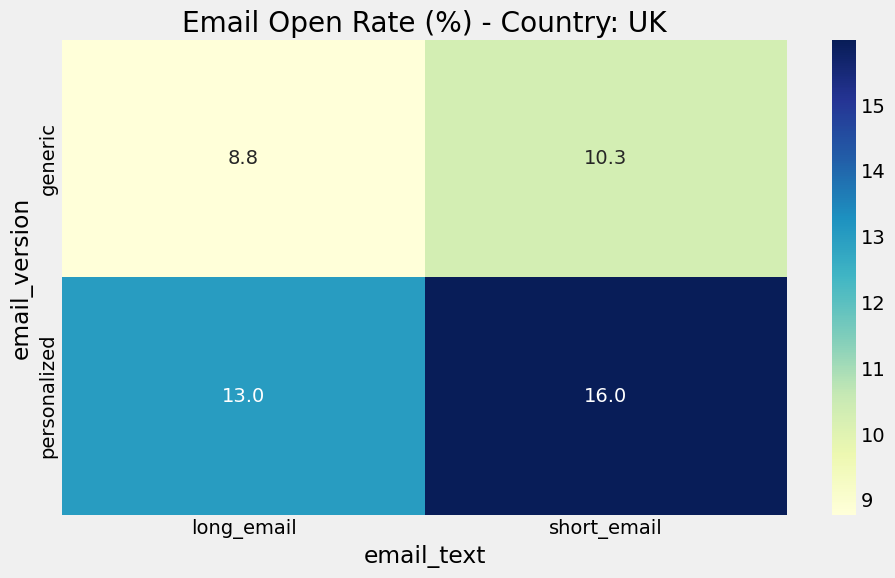

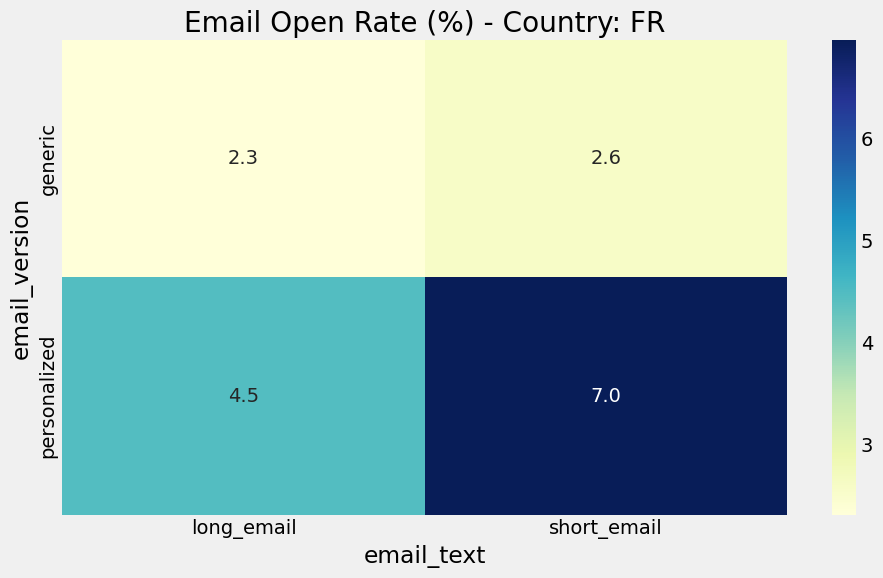

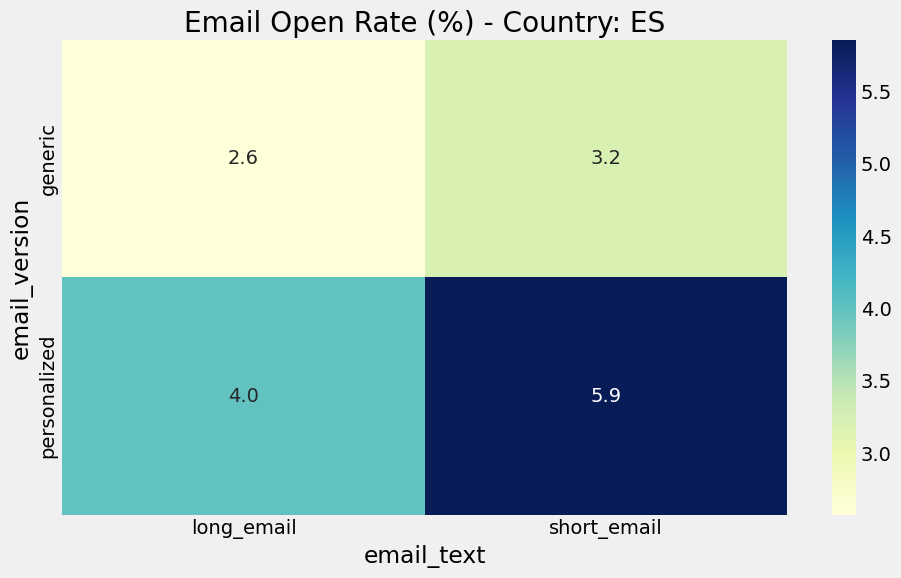

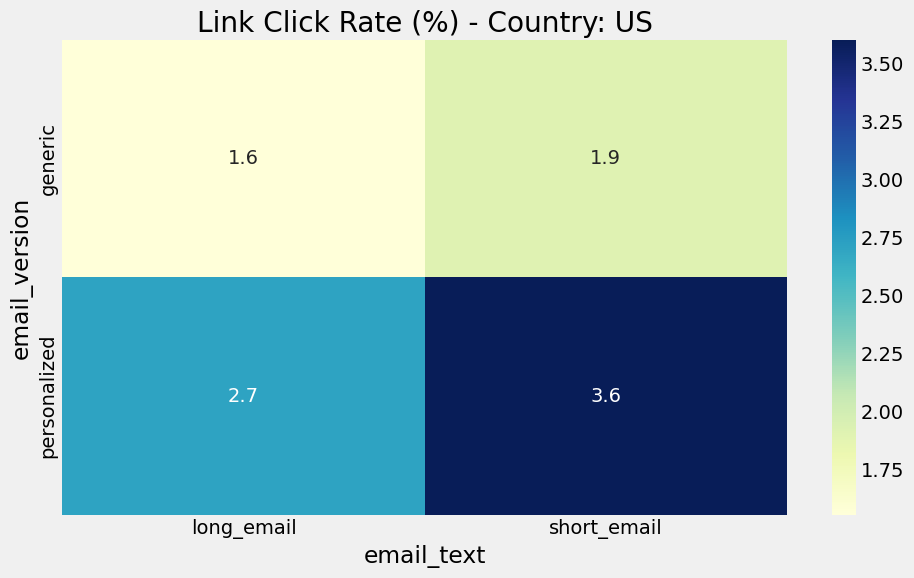

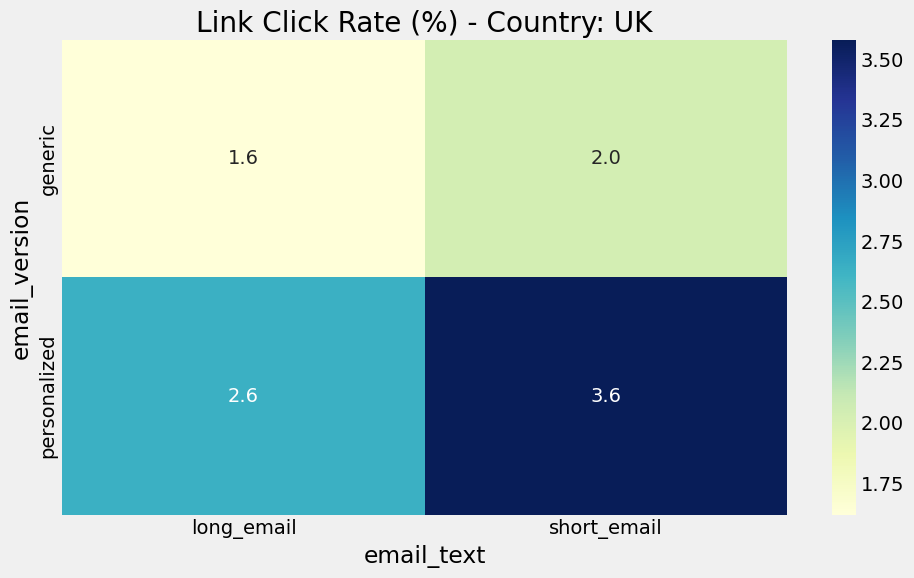

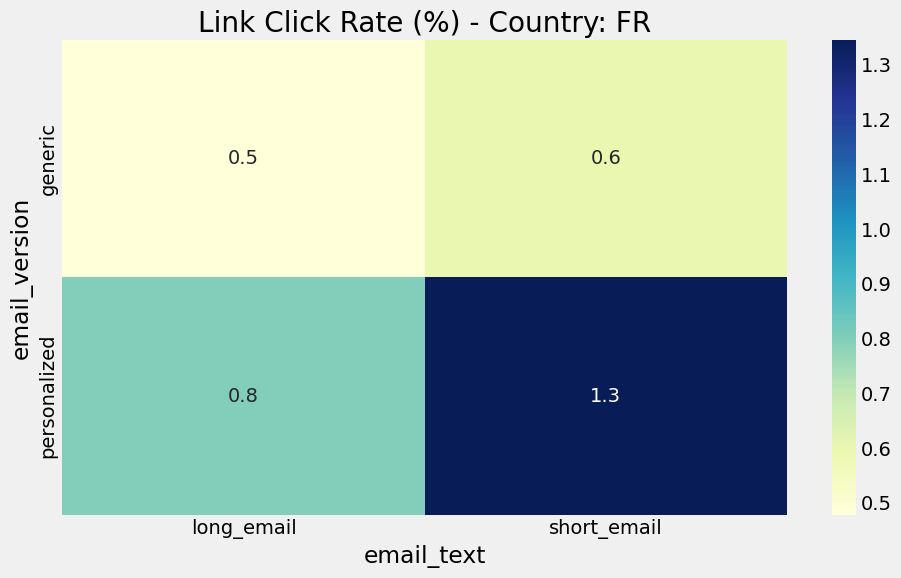

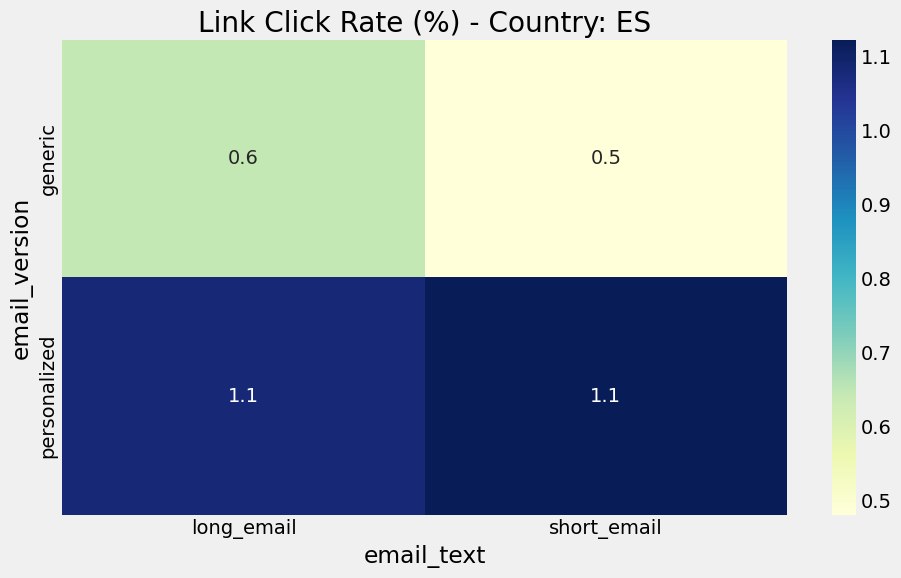

In [14]:
# Create a three-way heatmap (user_country, email_version, email_text)
for target, title in [('email_opened', 'Email Open Rate'), ('link_clicked', 'Link Click Rate')]:
    # For top countries only
    for country in top_countries:
        country_data = email_table_df[email_table_df['user_country'] == country]
        
        pivot_data = country_data.pivot_table(
            values=target,
            index='email_version',
            columns='email_text',
            aggfunc='mean'
        ) * 100  # Convert to percentage
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f')
        plt.title(f'{title} (%) - Country: {country}')
        plt.tight_layout()
        plt.show()

In [15]:
import plotly.express as px
import plotly.graph_objects as go

# Create interactive sunburst chart (hierarchical data visualization)
fig = px.sunburst(
    email_table_df,
    path=['user_country', 'weekday', 'email_version'],
    values='link_clicked',
    color='link_clicked',
    color_continuous_scale='YlGnBu',
    title='Link Click Patterns by Country, Weekday, and Email Version'
)
fig.show()

#### From the above cells, the following conclusions can be drawn:
- the higher the number of past purchases the higher the chance of clicking on the link:
    - users with over 20 purchases have a 100% probability of clicking on the link

- users recieving a personalized email generally tend to click on the link

- the trend of users from different countries in clicking the links is, as follows:
    - users from US have the highest rate of link clicking, and emails sent throughout the week with a higher preference for Wednesday around midnight or during 10 am - 1 pm with personalized emails have higher link click rate
    - users from UK have the second highest rate of link clicking, and emails sent throughout the week around midnight or during 10 am - 1 pm or in the evening with personalized short-text emails have higher link click rate
    - users from FR have the third highest rate of link clicking, and emails sent on Monday, Wednesday, Thursday and Saturday around 9 pm with personalized short-text emails have higher link click rate
    - users from ES have the highest rate of link clicking, and emails sent on Monday, Tuesday and Wednesday throughout the day except during nighttime with personalized emails have higher link click rate

---

In [16]:
# print the unique values in all the columns in email_table_df (except the "email_id" column)
cols_to_leave_temp = ['email_id', 'email_opened', 'link_clicked']
for col in email_table_df:
    if col not in cols_to_leave_temp:
        unique_vals = sorted(email_table_df[col].unique())
        print(f"Number of unique value in {col}: {len(unique_vals)}")
        print(f"Unique values:\n{unique_vals}")
        print()

Number of unique value in email_text: 2
Unique values:
['long_email', 'short_email']

Number of unique value in email_version: 2
Unique values:
['generic', 'personalized']

Number of unique value in hour: 24
Unique values:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Number of unique value in weekday: 7
Unique values:
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Number of unique value in user_country: 4
Unique values:
['ES', 'FR', 'UK', 'US']

Number of unique value in user_past_purchases: 23
Unique values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]



***It can be noted from the results that we'd need to apply one-hot encoding to: ['email_text', 'email_version', 'user_country']***

***Since, columns 'user_past_purchases' and 'hour' already have numeric values(int64), we can ignore encoding them.***

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
categorical_features = ['email_text', 'email_version', 'user_country']
encoded_features = encoder.fit_transform(email_table_df[categorical_features])

# Get feature names
feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(
    encoded_features,
    columns=feature_names,
    index=email_table_df.index
)

# convert the hours to sine and cosine transformations
email_table_df['hour_sin'] = np.sin(email_table_df['hour'] * (2 * np.pi / 24))
email_table_df['hour_cos'] = np.cos(email_table_df['hour'] * (2 * np.pi / 24))

# Add the encoded columns back to the original DataFrame
train_df = pd.concat([email_table_df[['user_past_purchases', 'hour_sin', 'hour_cos']], encoded_df], axis=1)

# Verify the shape
print(f"Original shape: {email_table_df.shape}")
print(f"New shape: {train_df.shape}")
train_df.head()

Original shape: (100000, 11)
New shape: (100000, 11)


,user_past_purchases,hour_sin,hour_cos,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,5,5.000000e-01,8.660254e-01,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1.224647e-16,-1.000000e+00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,2.588190e-01,-9.659258e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1.000000e+00,6.123234e-17,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6,-5.000000e-01,-8.660254e-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
X = train_df.to_numpy()
y_click = email_table_df['link_clicked'].to_numpy()

print(f'Shape of X: {X.shape}')
print(f'Shape of y_click: {y_click.shape}')

Shape of X: (100000, 11)
Shape of y_click: (100000,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y_click, random_state=42, test_size=0.2)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (80000, 11)
Shape of X_test: (20000, 11)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


In [21]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # Handle class imbalance with SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Define parameter grid for optimization
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Create and train an optimized model with grid search
# grid_search = GridSearchCV(
#     estimator=GradientBoostingClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='average_precision',
#     n_jobs=-1
# )
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Best model
# optimized_model = grid_search.best_estimator_
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_:.3f}")

In [20]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)
print(f"AUC: {auc:.3f}, Average Precision: {avg_precision:.3f}")

AUC: 0.722, Average Precision: 0.056


In [23]:
def transform_features_for_prediction(features, encoder):
    """
    Transform raw features into the format expected by the model
    """
    # Create DataFrame with single row
    df = pd.DataFrame([features])
    
    # Extract numeric features
    numeric_features = df[['user_past_purchases', 'hour_sin', 'hour_cos']]
    
    # One-hot encode categorical features
    categorical_features = df[['email_text', 'email_version', 'user_country']]
    encoded_features = encoder.transform(categorical_features)
    encoded_df = pd.DataFrame(
        encoded_features,
        columns=encoder.get_feature_names_out(['email_text', 'email_version', 'user_country'])
    )
    
    # Combine all features
    X = pd.concat([numeric_features, encoded_df], axis=1).values.flatten()
    return X


def get_predicted_click_probability(user_features, model, encoder):
    """
    Get predicted click probability for different email configurations
    """
    # Base user features (country, past_purchases)
    base_features = {
        'user_country': user_features['user_country'],
        'user_past_purchases': user_features['user_past_purchases']
    }
    
    results = []
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = list(range(24))
    email_versions = ['generic', 'personalized']
    email_texts = ['short', 'long']
    
    # Generate all combinations for this user
    for weekday in weekdays:
        for hour in hours:
            for email_version in email_versions:
                for email_text in email_texts:
                    # Create complete feature set
                    features = base_features.copy()
                    features['weekday'] = weekday
                    features['hour'] = hour
                    features['hour_sin'] = np.sin(hour * (2 * np.pi / 24))
                    features['hour_cos'] = np.cos(hour * (2 * np.pi / 24))
                    features['email_version'] = email_version
                    features['email_text'] = email_text
                    
                    # Transform to model input format
                    X_pred = transform_features_for_prediction(features, encoder)
                    
                    # Get probability
                    prob = model.predict_proba(X_pred.reshape(1, -1))[0, 1]
                    
                    results.append({
                        'weekday': weekday,
                        'hour': hour,
                        'email_version': email_version,
                        'email_text': email_text,
                        'click_probability': prob
                    })
    
    # Sort by probability
    results.sort(key=lambda x: x['click_probability'], reverse=True)
    return results